# $$\text{Atividade Avaliativa 3 - Laboratório de Teoria de Controle}$$
##### $$\text{Erick}$$

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 8)
colors = ['C0', 'C1', 'C2', 'C4', 'C5', 'black', 'pink', 'y']

### $$\text{Questão 3:}$$

In [2]:
s = ct.tf('s')

G = ((s+1)/((s**2)+(4*s)+2))

ss = ct.tf2ss(G)

ss

StateSpace(array([[-4., -2.],
       [ 1.,  0.]]), array([[1.],
       [0.]]), array([[1., 1.]]), array([[0.]]))

Acomodação em malha aberta: 5.532677381833143 s


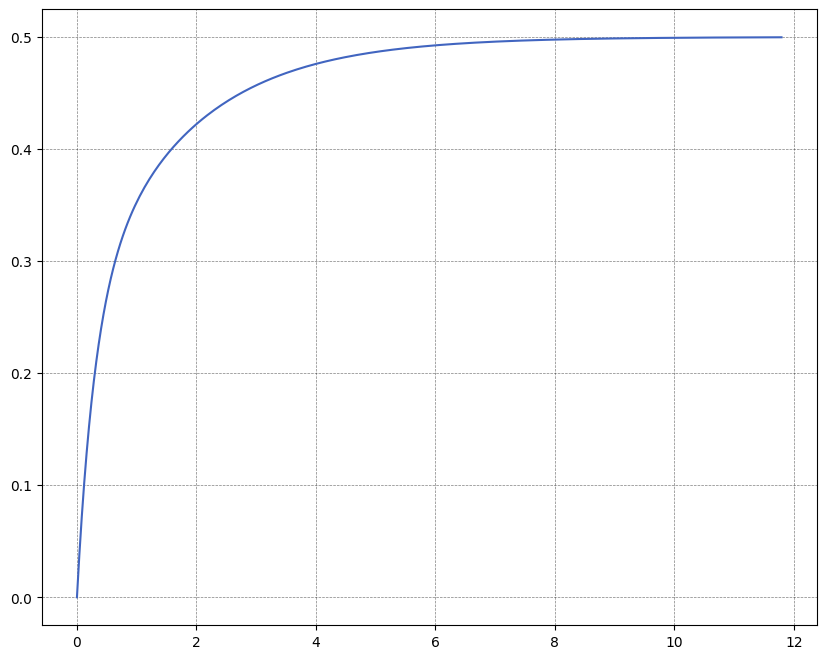

In [4]:
sol = ct.step_response(ss)
stepma = ct.step_info(ss)
st1 = stepma['SettlingTime']
print(f'Acomodação em malha aberta: {st1} s')

plt.figure()
plt.plot(sol[0], sol[1])
plt.show()

In [5]:
p = ct.poles(ss)

p

array([-3.41421356+0.j, -0.58578644+0.j])

In [6]:
#Polos desejados: 4/3 mais distantes (ajuste necessário por causa da interferência do zero na dinâmica):
pd = [1.2*p[0].real, 1.2*p[1].real]

pd

[-4.097056274847714, -0.702943725152286]

In [7]:
k = ct.place(ss.A, ss.B, pd)[0]

k

array([0.8 , 0.88])

In [8]:
#Sistema:
sys = ct.ss(ss.A,ss.B,np.vstack([ss.C[0], np.identity(len(ss.C[0]))]),np.zeros((len(ss.C[0])+1, 1)), inputs=['u'], outputs=['y', 'x1', 'x2'])

#Gerando o sinal de feedback:
K = []
kxl = []
for i in range(len(k)):
    current_kxl = f'kx{i+1}'
    K.append(ct.tf((k[i]), (1), inputs=f'x{i+1}', outputs=current_kxl))
    kxl.append(current_kxl)
somfb = ct.summing_junction(inputs=kxl, output='feedback')

#Somador que gera o sinal u:
som = ct.summing_junction(inputs=['r', '-feedback'], output='u')

#Interconnect:
componentes = [sys, somfb, som]
componentes.extend(K)
L = ct.interconnect(componentes, inputs='r', outputs=['u', 'y', 'x1', 'x2'])

Acomodação em malha fechada: 4.139411909765676 s


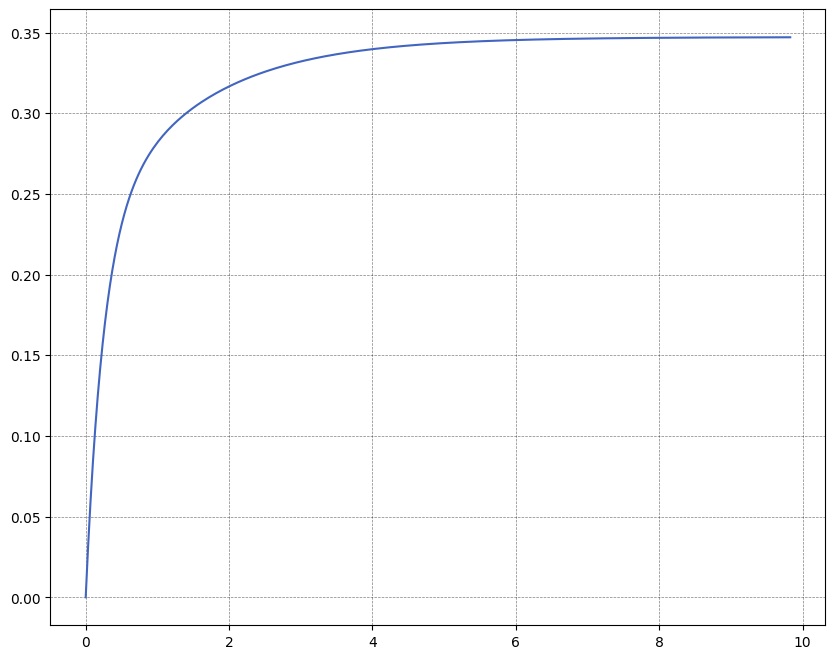

In [9]:
sol = ct.step_response(L)
stepmf = ct.step_info(L)[1][0]
st2 = stepmf['SettlingTime']
print(f'Acomodação em malha fechada: {st2} s')

plt.figure()
plt.plot(sol[0], sol[1][1][0])
plt.show()

In [10]:
st2/st1

0.7481751824817524